In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
shark_tank = pd.read_csv(r'Shark Tank India.csv', index_col='Pitch Number')
shark_tank.shape

(320, 63)

In [3]:
shark_tank.head()

,Season Number,Season Start,Season End,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,...,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name
Pitch Number,,,,,,,,,,,,,,,,,,,,,
1,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,BluePineFoods,Food,Frozen Momos,https://bluepinefoods.com/,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,BoozScooters,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,HeartUpMySleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",TagzFoods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",HeadAndHeart,Education,Brain Development Course,https://thehnh.in/,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
shark_tank.columns

Index(['Season Number', 'Season Start', 'Season End', 'Episode Number',
       'Episode Title', 'Startup Name', 'Industry', 'Business Description',
       'Company Website', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Started in', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Debt Interest',
       'Deal Valuation', 'Number of sharks in deal', 'Deal has conditions',
       'Has Patents', 'Ashneer Investment Amount', 'Ashneer Investment Equity',
       'Ashneer Debt Amount', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Anupam Investment Amount', 'Anupam Investment Equity',
       'Anupam

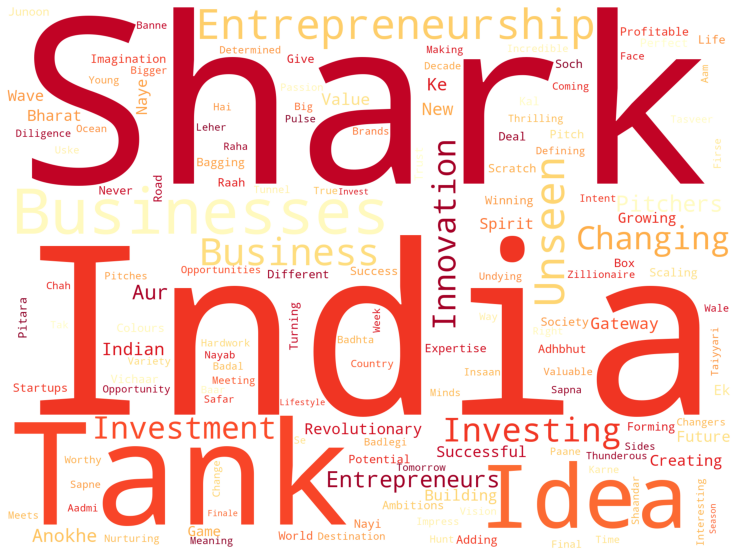

In [5]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ko"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='white', colormap='YlOrRd', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data Cleaning

In [6]:
shark_tank = shark_tank.fillna(0)

## Dataset Info

In [7]:
shark_tank.head()

,Season Number,Season Start,Season End,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,...,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name
Pitch Number,,,,,,,,,,,,,,,,,,,,,
1,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,BluePineFoods,Food,Frozen Momos,https://bluepinefoods.com/,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,BoozScooters,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,HeartUpMySleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",TagzFoods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",HeadAndHeart,Education,Brain Development Course,https://thehnh.in/,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
pd.DataFrame({
    'Number of Episodes':[shark_tank['Episode Number'].max()],
    'Startup Pitched':[shark_tank['Startup Name'].count()],
    'Total Invested Amount(in Lakhs)':[int(shark_tank['Total Deal Amount'].sum())],
    'Total Equity':[int(shark_tank['Total Deal Equity'].sum())],
    'Number of Deals Closed':[shark_tank['Accepted Offer'].value_counts()[1]]
    },index=['Count'])

,Number of Episodes,Startup Pitched,Total Invested Amount(in Lakhs),Total Equity,Number of Deals Closed
Count,51,320,11005,1789,176


## Data Stats

### Industry-wise pitches


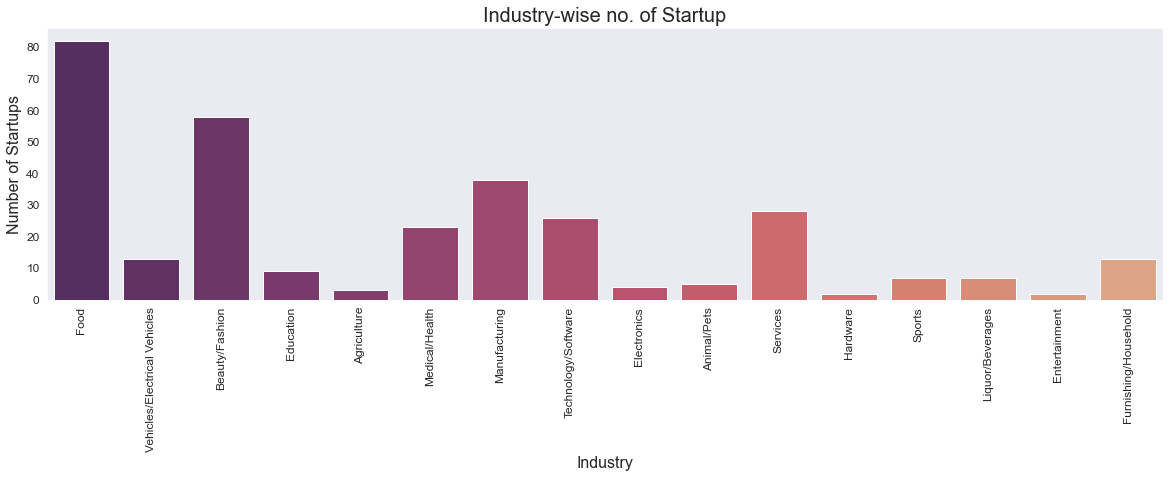

In [65]:
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xticks(rotation='vertical')
sns.countplot(shark_tank['Industry'], palette='flare_r')
plt.title("Industry-wise no. of Startup",fontsize=20)
plt.xlabel("Industry",fontsize=16)
plt.ylabel('Number of Startups',fontsize=16)
plt.show()

### State Wise

In [66]:
from collections import Counter
col = shark_tank[(shark_tank['Pitchers State']!=0)]['Pitchers State'].tolist()
d = Counter(col)
df = pd.DataFrame({
    'States':d.keys(),
    'Number of Startups':d.values()
})

In [67]:
shp_gdf = gpd.read_file(r"D:\Github\EDA\Shark Tank\India_State_Shapefile\Indian_states.shp")
merged = shp_gdf.set_index('st_nm').join(df.set_index('States'))
merged['Number of Startups'] = merged['Number of Startups']

Maharashtra                  92
Delhi                        44
Karnataka                    34
Gujarat                      32
Haryana                      18
Uttar Pradesh                13
West Bengal                  13
Telangana                    12
Rajasthan                    11
Tamil Nadu                    8
Punjab                        8
Madhya Pradesh                5
Bihar                         4
Jammu & Kashmir               3
Goa                           3
Kerala                        2
Kerala,Maharashtra            1
Uttarakhand,Uttar Pradesh     1
Gujarat,Uttar Pradesh         1
Jharkhand,Chhattisgarh        1
Karnataka,Andhra Pradesh      1
Haryana,Maharashtra           1
Chhattisgarh                  1
Haryana,West Bengal           1
Uttarakhand                   1
Telangana,Maharashtra         1
Karnataka,Telangana           1
Jharkhand                     1
Himachal Pradesh              1
Haryana,Madhya Pradesh        1
Delhi,Maharashtra             1
Karnatak

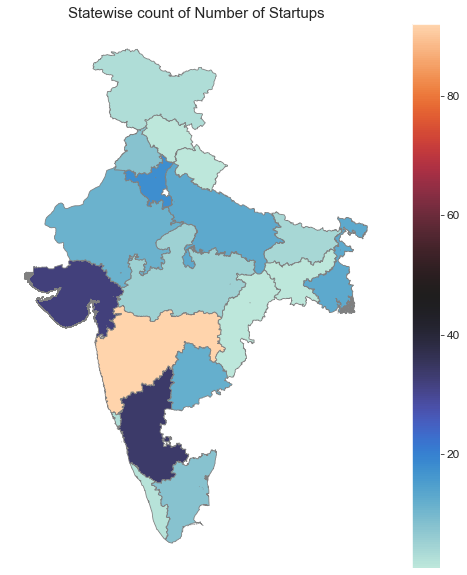

In [72]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Statewise count of Number of Startups', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Number of Startups', cmap='icefire', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)
print(shark_tank['Pitchers State'].value_counts(), "\n")



### Year Wise

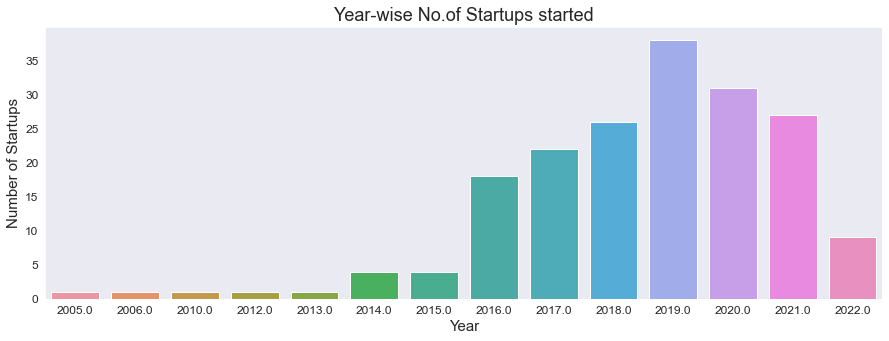

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Started in']!=0]['Started in'])
plt.title("Year-wise No.of Startups started",fontsize=18)
plt.ylabel('Number of Startups',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.show()

### Received v/s Not Received *Offer*

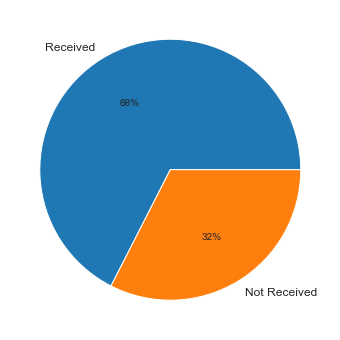

In [78]:
data = [shark_tank['Received Offer'].sum(), shark_tank.shape[0]-shark_tank['Received Offer'].sum()]
labels = ['Received', 'Not Received']
plt.figure(figsize=(12,6))
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

### Accepted v/s Not Accepted *Offer*

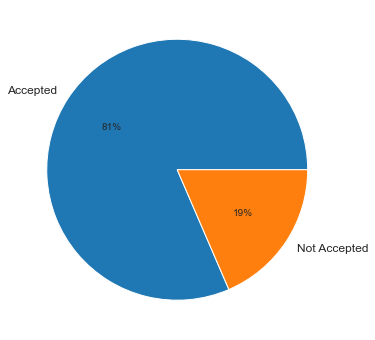

In [79]:
data = [shark_tank['Accepted Offer'].sum(), shark_tank['Received Offer'].sum()-shark_tank['Accepted Offer'].sum()]
labels = ['Accepted', 'Not Accepted']
plt.figure(figsize=(12,6))
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

## Data Analysis

### Male vs Female Presenters

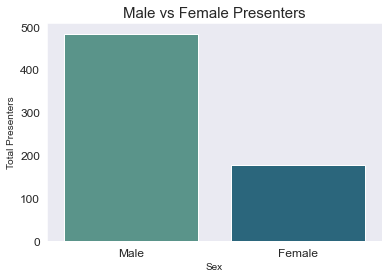

In [81]:
df = pd.DataFrame({
    'Total Presenters':[shark_tank['Male Presenters'].sum(),shark_tank['Female Presenters'].sum()],
    'Sex':['Male','Female']
})
plt.title('Male vs Female Presenters',fontsize=15)
sns.barplot(y='Total Presenters', x='Sex', data=df, palette='crest')
plt.show()

### Pitcher's Average Age


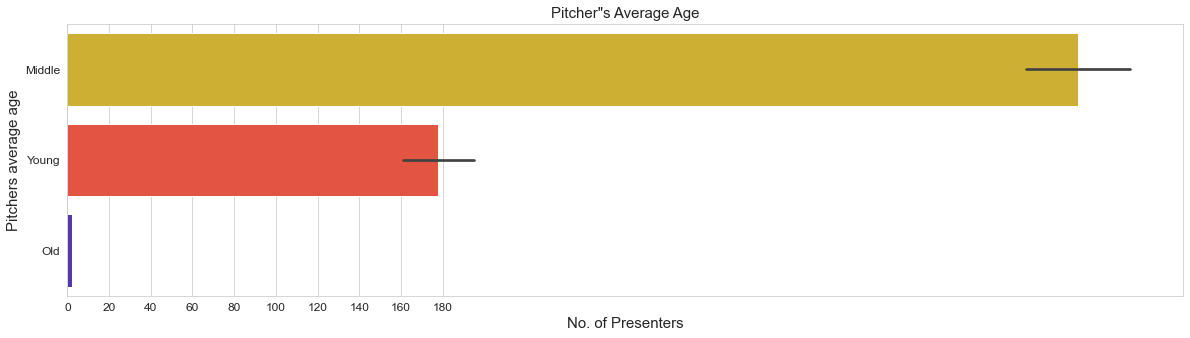

In [85]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.barplot(x='Number of Presenters', y='Pitchers Average Age', data=shark_tank, palette='CMRmap_r', estimator = np.sum)
plt.title('Pitcher"s Average Age',fontsize=15)
plt.xlabel("No. of Presenters",fontsize=15)
plt.ylabel("Pitchers average age",fontsize=15)
plt.xticks(range(0,200,20))
plt.show()

### Number of sharks in deal

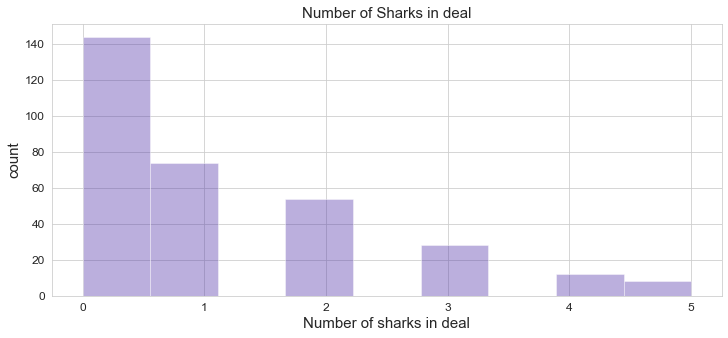

In [86]:
plt.figure(figsize=(12,5))
plt.title('Number of Sharks in deal',fontsize=15)
plt.xlabel("No. of sharks in deal",fontsize=15)
plt.ylabel("count",fontsize=15)

sns.set_style('dark')
sns.distplot(shark_tank['Number of sharks in deal'], kde=False, color='#5539AB')
plt.show()

### Invested Amount per Episode

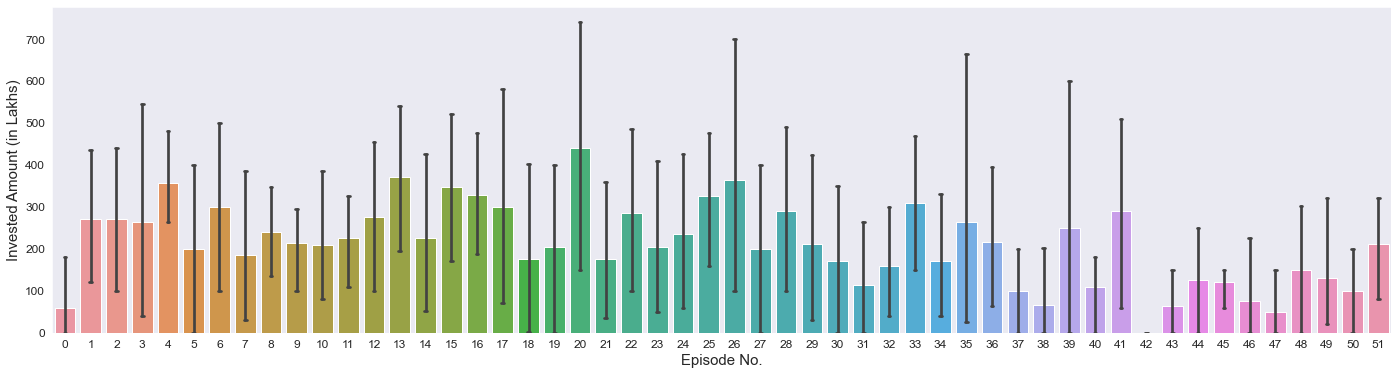

In [87]:
plt.figure(figsize=(24,6))
sns.barplot(data=shark_tank, x="Episode Number", y="Total Deal Amount", estimator=np.sum, capsize=0.1)
plt.xlabel("Episode No.",fontsize=15)
plt.ylabel('Invested Amount (in Lakhs)',fontsize=15)
plt.show()

### Highest Investment

As per Highest Deal Amount

In [91]:
df = shark_tank.loc[shark_tank['Accepted Offer']==1,['Startup Name', 'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt']]
df = df.sort_values(by=['Total Deal Amount'],ascending=False)[:10]

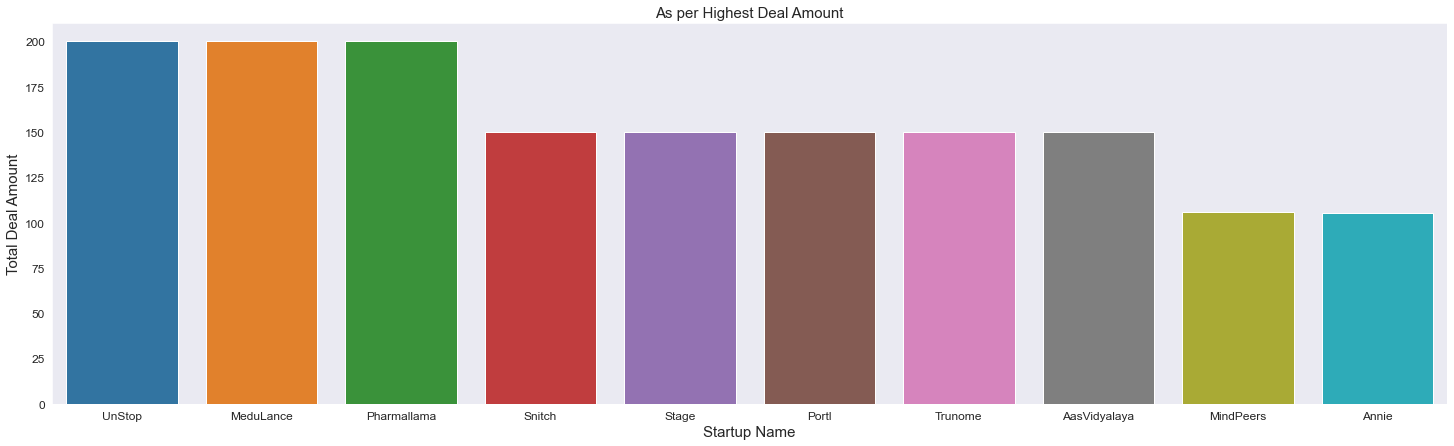

In [93]:
plt.figure(figsize=(25,7))
sns.barplot(x='Startup Name', y='Total Deal Amount', data=df)
plt.title('As per Highest Deal Amount',fontsize=15)
plt.xlabel("Startup Name",fontsize=15)
plt.ylabel("Total Deal Amount",fontsize=15)
plt.show()

As per Highest Debt

In [22]:
df = shark_tank.loc[shark_tank['Accepted Offer']==1,['Startup Name', 'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt']]
df = df.sort_values(by=['Total Deal Debt'],ascending=False)[:10]

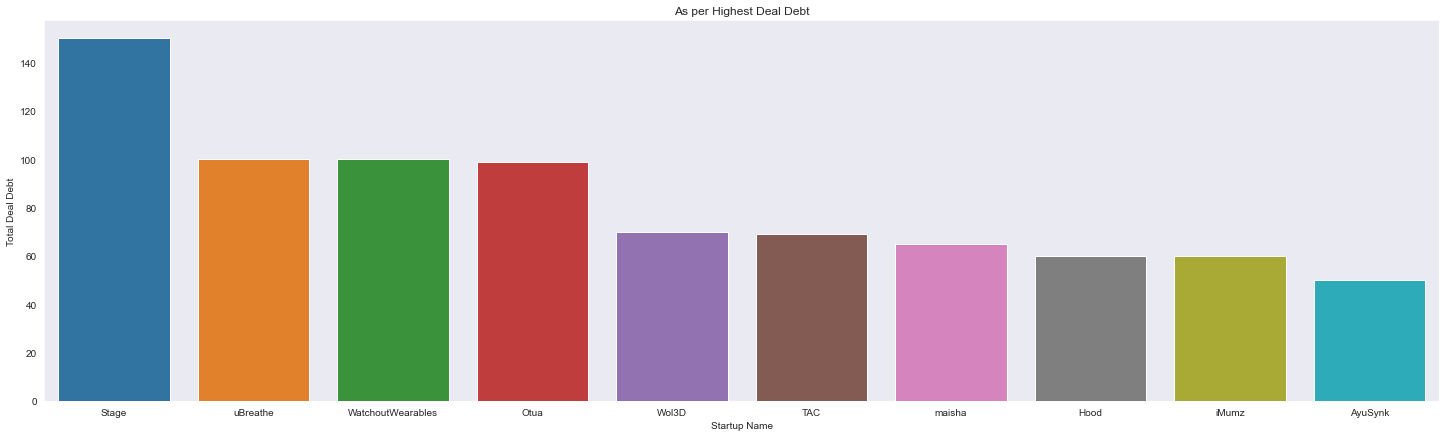

In [23]:
plt.figure(figsize=(25,7))
sns.barplot(x='Startup Name', y='Total Deal Debt', data=df)
plt.title('As per Highest Deal Debt')
plt.show()

As per Highest Equity

In [24]:
df = shark_tank.loc[shark_tank['Accepted Offer']==1,['Startup Name', 'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt']]
df = df.sort_values(by=['Total Deal Equity'],ascending=False)[:10]

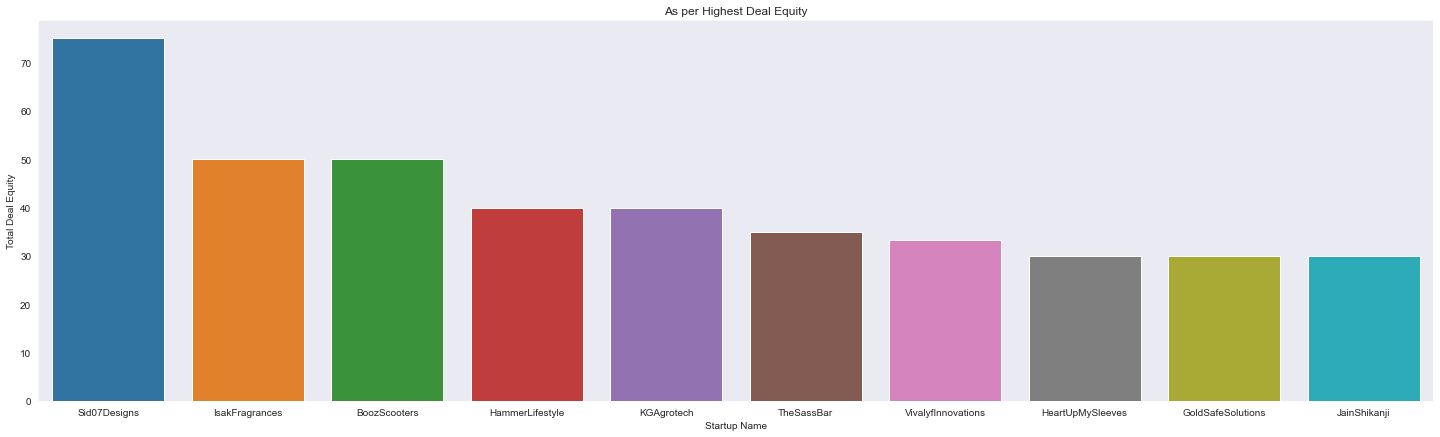

In [25]:
plt.figure(figsize=(25,7))
sns.barplot(x='Startup Name', y='Total Deal Equity', data=df)
plt.title('As per Highest Deal Equity')
plt.show()

## Sharks Investment Analysis

### Aman's Investment Stats

In [26]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Aman Investment Amount'].sum()//1],
    'Debt Amt(Lakhs)':[shark_tank['Aman Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Aman Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,2510.0,311.0,260.9326


#### Industry Wise

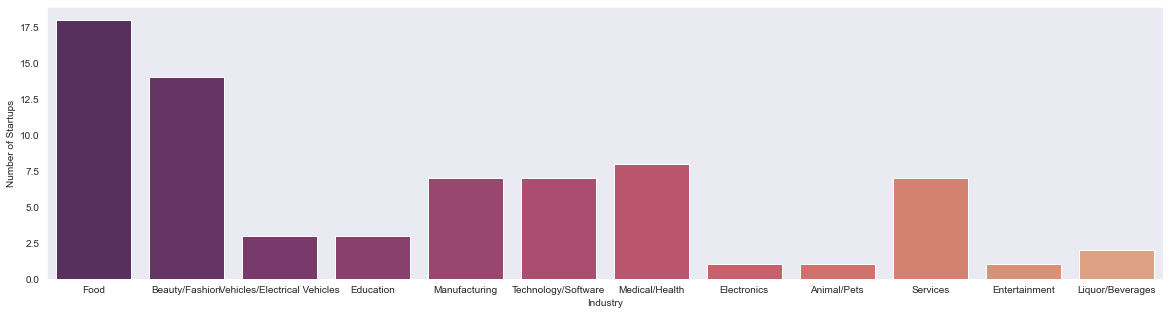

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(shark_tank[shark_tank['Aman Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [28]:
shark_tank.loc[(shark_tank['Aman Investment Amount']!=0),['Startup Name','Number of sharks in deal','Aman Investment Amount','Aman Investment Equity','Aman Debt Amount']].head()

,Startup Name,Number of sharks in deal,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount
Pitch Number,,,,,
1,BluePineFoods,3.0,25.0,5.33,0.0
8,Peeschute,1.0,75.0,6.00,0.0
12,Bummer,2.0,37.5,3.75,0.0
13,RevampMoto,2.0,50.0,0.75,0.0
16,SkippiIcePops,5.0,20.0,3.00,0.0


### Ashneer's Investment Stats

In [29]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Ashneer Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Ashneer Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Ashneer Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,539.33,114.0,93.24


#### Industry Wise

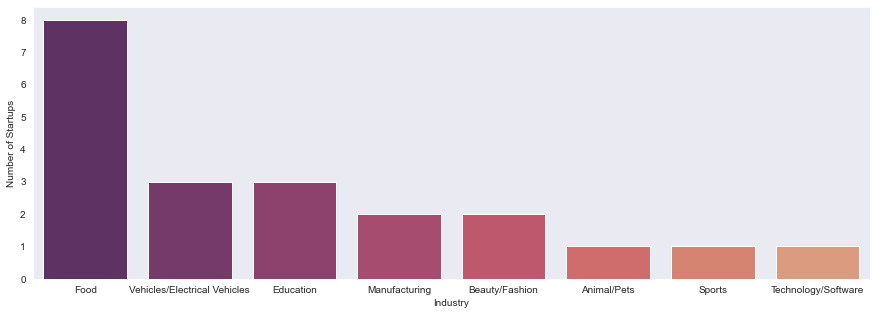

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Ashneer Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [31]:
shark_tank.loc[(shark_tank['Ashneer Investment Amount']!=0),['Startup Name','Number of sharks in deal','Ashneer Investment Amount','Ashneer Investment Equity','Ashneer Debt Amount']].head()

,Startup Name,Number of sharks in deal,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount
Pitch Number,,,,,
1,BluePineFoods,3.0,25.0,5.33,0.0
2,BoozScooters,2.0,20.0,25.00,0.0
4,TagzFoods,1.0,70.0,2.75,0.0
16,SkippiIcePops,5.0,20.0,3.00,0.0
19,RaisingSuperstars,2.0,50.0,2.00,0.0


### Anupam's Investment Stats

In [32]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Anupam Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Anupam Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Anupam Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,1451.160268,97.0,305.828


#### Industry Wise

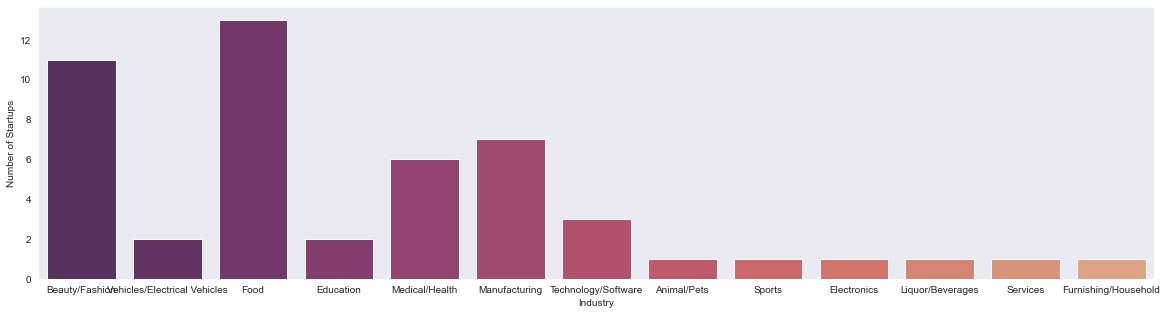

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(shark_tank[shark_tank['Anupam Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [34]:
shark_tank.loc[(shark_tank['Anupam Investment Amount']!=0),['Startup Name','Number of sharks in deal','Anupam Investment Amount','Anupam Investment Equity','Anupam Debt Amount']].head()

,Startup Name,Number of sharks in deal,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount
Pitch Number,,,,,
3,HeartUpMySleeves,2.0,12.5,15.00,0.0
10,CosIQ,2.0,25.0,12.50,0.0
13,RevampMoto,2.0,50.0,0.75,0.0
16,SkippiIcePops,5.0,20.0,3.00,0.0
21,Kavach,2.0,2.5,5.00,0.0


### Namita's Investment Stats

In [35]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Namita Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Namita Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Namita Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,2097.510269,525.0,301.5936


#### Industry Wise

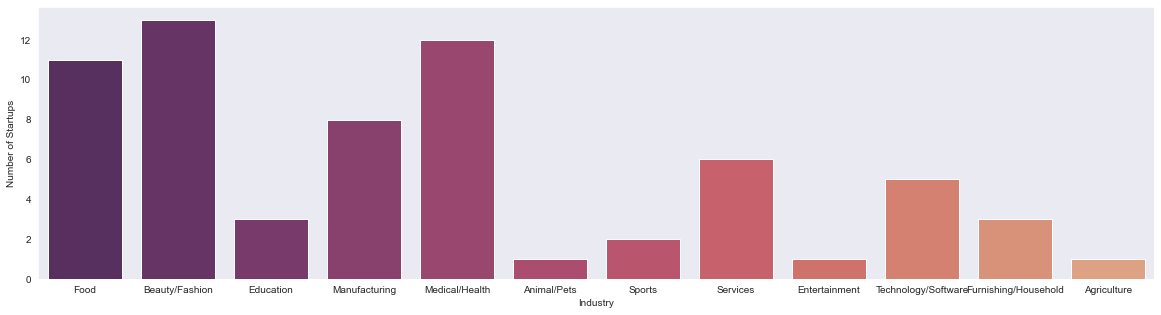

In [36]:
plt.figure(figsize=(20,5))
sns.countplot(shark_tank[shark_tank['Namita Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [37]:
shark_tank.loc[(shark_tank['Namita Investment Amount']!=0),['Startup Name','Number of sharks in deal','Namita Investment Amount','Namita Investment Equity','Namita Debt Amount']].head()

,Startup Name,Number of sharks in deal,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount
Pitch Number,,,,,
11,JhaJiAchaar,2.0,28.3,2.81,0.0
12,Bummer,2.0,37.5,3.75,0.0
16,SkippiIcePops,5.0,20.0,3.00,0.0
17,Menstrupedia,1.0,50.0,20.00,0.0
26,Altor,2.0,25.0,3.50,0.0


### Vineeta's Investment Stats

In [38]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Vineeta Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Vineeta Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Vineeta Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,1170.6,229.0,242.302


#### Industry Wise

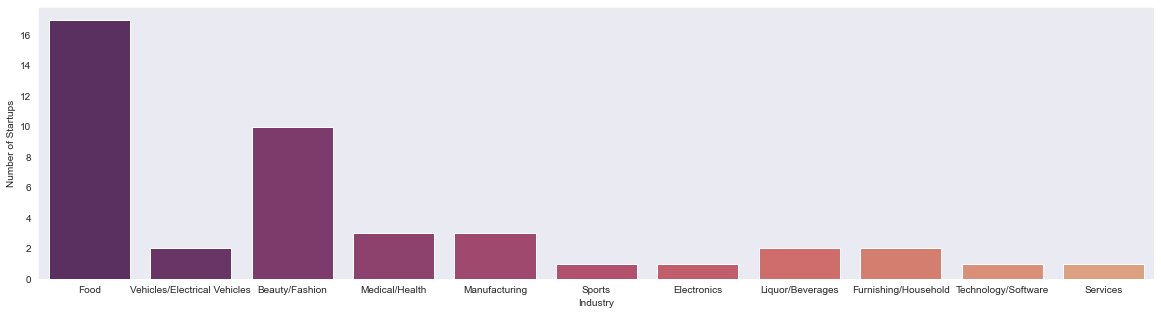

In [39]:
plt.figure(figsize=(20,5))
sns.countplot(shark_tank[shark_tank['Vineeta Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [40]:
shark_tank.loc[(shark_tank['Vineeta Investment Amount']!=0),['Startup Name','Number of sharks in deal','Vineeta Investment Amount','Vineeta Investment Equity','Vineeta Debt Amount']].head()

,Startup Name,Number of sharks in deal,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount
Pitch Number,,,,,
1,BluePineFoods,3.0,25.0,5.33,0.0
2,BoozScooters,2.0,20.0,25.00,0.0
3,HeartUpMySleeves,2.0,12.5,15.00,0.0
9,NOCD,1.0,20.0,15.00,30.0
10,CosIQ,2.0,25.0,12.50,0.0


### Peyush's Investment Stats

In [41]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Peyush Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Peyush Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Peyush Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,2210.380253,342.0,422.114


#### Industry Wise

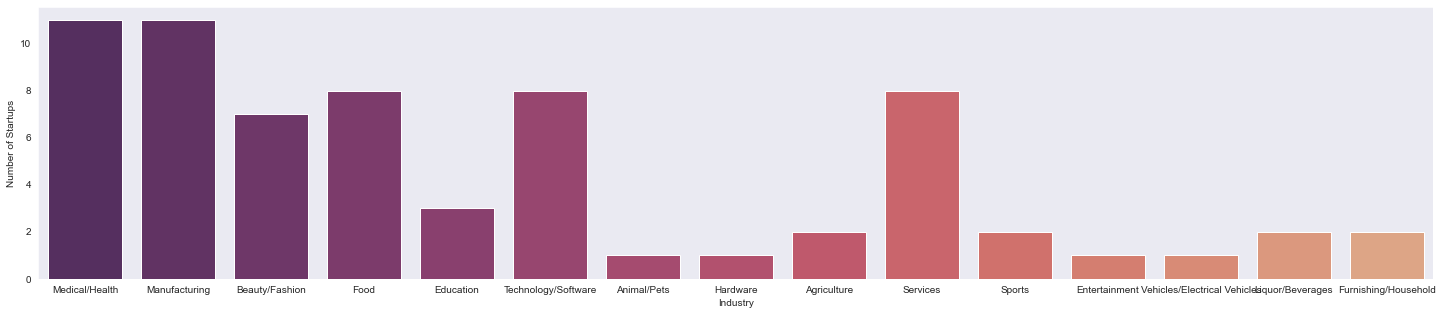

In [42]:
plt.figure(figsize=(25,5))
sns.countplot(shark_tank[shark_tank['Peyush Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [43]:
shark_tank.loc[(shark_tank['Peyush Investment Amount']!=0),['Startup Name','Number of sharks in deal','Peyush Investment Amount','Peyush Investment Equity','Peyush Debt Amount']].head()

,Startup Name,Number of sharks in deal,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount
Pitch Number,,,,,
24,VivalyfInnovations,2.0,28.00,16.66,0.0
27,Ariro,2.0,25.00,5.00,0.0
29,Nuutjob,3.0,8.33,6.66,0.0
30,Meatyour,3.0,10.00,6.66,0.0
31,EventBeep,3.0,10.00,1.00,0.0


### Ghazal's Investment Stats

In [44]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Ghazal Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Ghazal Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Ghazal Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,159.990252,0.0,51.7


#### Industry Wise

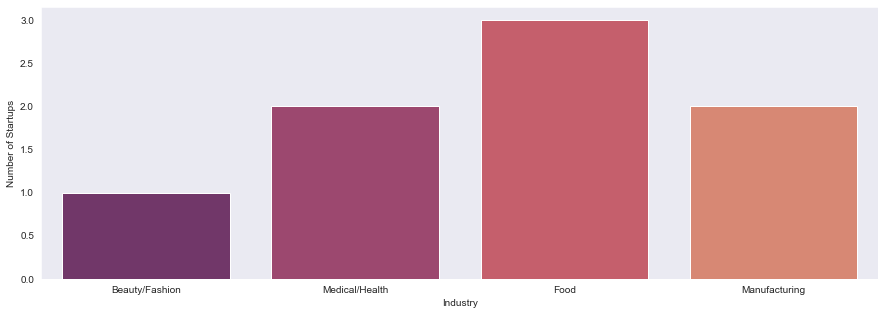

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Ghazal Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [46]:
shark_tank.loc[(shark_tank['Ghazal Investment Amount']!=0),['Startup Name','Number of sharks in deal','Ghazal Investment Amount','Ghazal Investment Equity','Ghazal Debt Amount']].head()

,Startup Name,Number of sharks in deal,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount
Pitch Number,,,,,
77,TheSassBar,2.0,25.000000,17.5,0.0
81,SunfoxTechnologies,5.0,20.000000,1.2,0.0
87,WattTechnovations,4.0,0.000253,1.0,0.0
90,HumpyA2,3.0,33.330000,5.0,0.0
92,GoldSafeSolutions,3.0,16.660000,10.0,0.0
